In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
#loading the dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
type(x_train)

numpy.ndarray

### scaling the data

In [17]:

x_train=x_train/255
x_test=x_test/255

In [18]:
#Flattening the x_train dataset.
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [19]:
x_train_flattened.shape

(60000, 784)

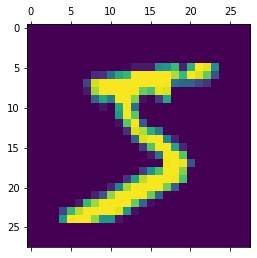

In [20]:
plt.matshow(x_train[0])

In [21]:
x_train_flattened.shape

(60000, 784)

In [22]:
from keras.models import Sequential
from keras.layers.core import Dense

### Creating the model

In [23]:
model=Sequential()

In [24]:
model.add(Dense(10,input_shape=(784,),activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [63]:
#fit is where the training actually happens 

In [26]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4649 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9257


In [15]:
model.fit(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2629 - accuracy: 0.9264


In [20]:
#Testing Case-1

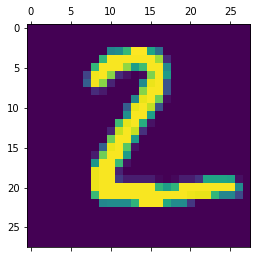

In [27]:
plt.matshow(x_test[1])

In [68]:
y_predicted=model.predict(x_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [29]:
y_predicted[1]

array([2.8957257e-01, 5.4752878e-03, 9.9915034e-01, 3.9920065e-01,
       7.0577277e-10, 8.9506924e-01, 8.8864017e-01, 1.4688939e-12,
       1.6823432e-01, 4.9877951e-09], dtype=float32)

In [71]:
#predicting which number it is

In [30]:
np.argmax(y_predicted[1])

2

In [21]:
#Testing Case-2

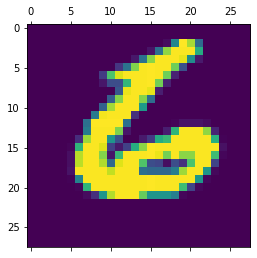

In [31]:
plt.matshow(x_test[9999])

In [32]:
np.argmax(y_predicted[9999])

6

In [57]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [59]:
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

### Creating confusion matrix 

In [86]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [88]:
pip install seaborn


     ------------------------------------ 285.1/285.1 kB 175.9 kB/s eta 0:00:00


Text(69.0, 0.5, 'Truth')

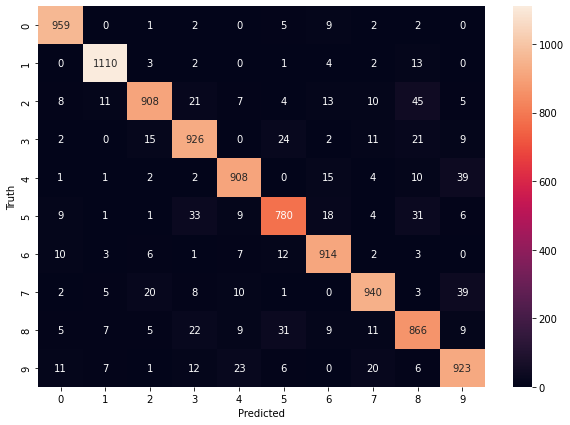

In [89]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')